# **Fashion-MNIST Database of Fashion Articles**

Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

In [1]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


# **Label	Description**

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

3


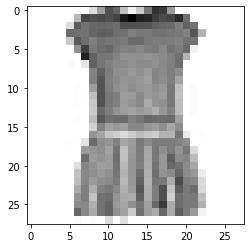

In [2]:
plt.imshow(x_train[3], cmap=plt.cm.binary)
print(y_train[3])

In [3]:
print(x_train.ndim)
print(x_train.shape)
print(x_train.dtype)

3
(60000, 28, 28)
uint8


In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [6]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
from keras.utils import to_categorical

print('Y Train:', y_train[0])
print('Y Test:', y_test[0])

print('\nY Train Shape:', y_train.shape)
print('Y Test Shape:', y_test.shape)

Y Train: 9
Y Test: 9

Y Train Shape: (60000,)
Y Test Shape: (10000,)


In [8]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print('Y Train:', y_train[0])
print('Y Test:', y_test[0])

print('Y Train Shape:', y_train.shape)
print('Y Test Shape:', y_test.shape)

Y Train: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Y Test: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Y Train Shape: (60000, 10)
Y Test Shape: (10000, 10)


In [15]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics = ['accuracy'])

model.fit(x_train, y_train, batch_size=50, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 2s 39us/step - loss: 1.5959 - accuracy: 0.5635
Epoch 2/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.8913 - accuracy: 0.7523
Epoch 3/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.6592 - accuracy: 0.7910
Epoch 4/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.5644 - accuracy: 0.8006
Epoch 5/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.5186 - accuracy: 0.8123
Epoch 6/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.4843 - accuracy: 0.8321
Epoch 7/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.4588 - accuracy: 0.8429
Epoch 8/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.4404 - accuracy: 0.8490
Epoch 9/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.4271 - accuracy: 0.8530
Epoch 10/20
60000/60000 [==============================

In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 22us/step
Test accuracy: 0.8331999778747559


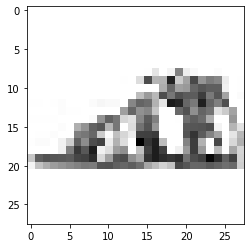

In [4]:
plt.imshow(x_test[11], cmap=plt.cm.binary)

In [14]:
import numpy as np
predictions = model.predict(x_test)
print(np.argmax(predictions[11]))

print(predictions[11])

5
[1.05703648e-05 9.37561890e-06 2.65689392e-04 1.28489955e-05
 9.49120804e-05 9.70952451e-01 1.83168228e-03 2.39985641e-02
 1.20047235e-03 1.62334403e-03]
